<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module6_Part2_CensusAPI_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Bureau API in R

The US Census Bureau is the main repository for data collected by the United States Government.  One of their goals is to provide this data back to the people.  An API is one of the ways data can be retrieved from their data systems.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Da3NSjH4_a4aef11lnFvZW8psLzmZR4E" width="75%" height="75%"></p>

The US Census Bureau has a variety of API that are used to retrieve data from different sources. Luckily, most of their APIs have a similar structure which means data can be accessed in similar ways.

Source:  https://www.census.gov/data/developers/data-sets.html

### Example #1 - American Community Survey (ACS)

The American Community Survey (ACS) is a good source for information about the people within the United States. The ACS data can be obtained on various census units, e.g. State level, County level, Zipcode level, School District level, Census Tract level, etc.  The following provides some examples of how to gain access to the data via their API.

Source: https://api.census.gov/data/2020/acs/acs5/examples.html

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1AUNc7dkcwxJJ3qcSvMA5Fjfk3Eu9YsNG" width="75%" height="75%"></p>



The American Community Survey is a very large survey that includes **about 28,000 variables**.  The list of all variables for ACS-5 can be obtained from the followign webpage (it take a while to load).  The **Name** of the variable is needed when making a request to the Census Bureau API.

Source:  https://api.census.gov/data/2020/acs/acs5/variables.html

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1h6MrwJ-csm3wZVQNUz5I1nRQZytStd42" width="75%" height="75%"></p>



The following is an example of the information returned by the Census Bureau API when making a request for the ACS-5 data.


*   Data Source: American Community Survey - 5 Year data
*   Census Unit:  Census Tract
*   Variables: NAME of Census Tract; B01001_001E, Estimate for Population Total
*   Other:  for = *, i.e. all tracts, in = state:27, i.e. FIPS code for MN

Note:  When pulling data at the Census Tract level, the API requires tha the state must be specifed.




<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Qjf2d9bIDQEPYNigMiDYGV_5WoL4pobU" width="75%" height="75%"></p>

### Example #2 - Small Area Health Insurance Estimates (SAHIE)

The Small Area Health Insurance Estimates (SAHIE) program can be used to obtain estimates regarding health insurance coverage for counties and states.

Source:  https://www.census.gov/data/developers/data-sets/Health-Insurance-Statistics.html

The following is an example of the information returned by the Census Bureau API when making a request on the SAHIE data.


*   Data Source: Small Area Health Insurance Estimates (SAHIE)
*   Census Unit:  County
*   Variables: NAME of County; PCTUI_PT, Percent Uninsured Estimate
*   Other:  for = county:*, i.e. all counties, time = 2019, i.e. Year 2019 data




<p align='center'><img src="https://drive.google.com/uc?export=view&id=1I-WP_Q5ckbxdJC5Cxb-cWfMqK8794Y5G" width="75%" height="75%"></p>



## Requesting an API Key

An API key is required to gain access to data from most organizations.  Much of the data that is available from the Census Bureau is free and open to the public.  Thus, obtaining a key for the Census Bureau's API is straight forward. 

Signup for Census API: https://api.census.gov/data/key_signup.html


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1yRQBELHlpHBE4bMeM3B5ZbAdPQEOwX0e" width="50%" height="50%"></p>

After submitting a request, an API Key is sent to the email address provided.  Again, this key belongs to you and should not be shared with others.  The Census Bureau may revoke your key if you do not follow their terms of service agreement.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1XJCO5MKEBfi4IPd7jpCZIV_fAdRnXkWW" width="50%" height="50%"></p>

## Using the censusapi package in R

The **censusapi** package was written by Hanna Recht who is currently a data journalist at Kaiser Health News. This R package is one of the most user-friendly packages that I've used to gain access to census data through their API.



*   Hanna Recht Homepage: https://www.hrecht.com/


First, let's download the most recent version of the **censusapi** R package.  The most recent version is provied on Hanna Recht's github page.  The **devtools** package will facilitate the download from a github site.

In [ ]:
install.packages("devtools")
devtools::install_github("hrecht/censusapi")
library(censusapi)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpzFfQpc/remotes435f318e33/hrecht-censusapi-6c9f80e/DESCRIPTION’ ... OK
* preparing ‘censusapi’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘censusapi_0.7.3.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘censusapi’


The following object is masked from ‘package:methods’:

    getFunction




There are a wide variety of calls that can be made with the censusapi R package. The following website provides some examples to get started.

*   censusapi - example calls: https://www.hrecht.com/censusapi/articles/example-masterlist.html

The website above does not include all possible calls.  A list of all possible calls is provided by the listCensusApis() function.

In [ ]:
#Getting a list of all possible API calls from censusapi 
All_APIs <- listCensusApis()

In [ ]:
#How many API calls are available
dim(All_APIs)

[1] 1245    8

### Saving your key to a system level variable

In R, it is common to save your API Key in a **system-level variable**.  A system-level variable permits you to permanently save this information within R.  

**Note**:  System-level variables are not permanent in Google Colab because Colab creates a new session each time a document is opened. 

In [ ]:
# Add key to system level environment for this Colab session
Sys.setenv(CENSUS_KEY="")

# Check to see that the expected key has been provided 
Sys.getenv("CENSUS_KEY")

### Example #3: Population per Census Tract in MN

Consider the following call to Census Bureau API.

*   Data Source: American Community Survey (ACS)
*   Census Unit:  Census Tract
*   Year: vintage = 2020
*   Variables: NAME of County; B011001_001E, i.e. population estimate
*   Other:  regionin = state:27, i.e. FIPS code for MN

In [ ]:
MN_CensusTract_Population <- getCensus(
                                        name = "acs/acs5",
                                        vintage = 2020, 
                                        vars = c("NAME", "B01001_001E"), 
                                        region = "tract:*",
                                        regionin = "state:27")
head(MN_CensusTract_Population)

,state,county,tract,NAME,B01001_001E
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,27,037,061102,"Census Tract 611.02, Dakota County, Minnesota",4593
2,27,037,061105,"Census Tract 611.05, Dakota County, Minnesota",2418
3,27,037,061106,"Census Tract 611.06, Dakota County, Minnesota",2700
4,27,037,061109,"Census Tract 611.09, Dakota County, Minnesota",3488
5,27,037,061110,"Census Tract 611.10, Dakota County, Minnesota",3649
6,27,037,061111,"Census Tract 611.11, Dakota County, Minnesota",2964


Next, load the **tidyverse** package that will allow us to manipulate our data.frame in R.

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The following dplyr code will clean up the data.frame returned by the Census Bureau API.

In [ ]:
(  
  MN_CensusTract_Population
  %>% mutate(GEOID = paste(state, county, tract))
  %>% mutate(GEOID = str_replace_all(GEOID, fixed(" "), ""))
  %>% rename(Population = B01001_001E, CensusTract_Name = NAME)
) -> MN_CensusTract_Population_Clean

head(MN_CensusTract_Population_Clean)

,state,county,tract,CensusTract_Name,Population,GEOID
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,27,037,061102,"Census Tract 611.02, Dakota County, Minnesota",4593,27037061102
2,27,037,061105,"Census Tract 611.05, Dakota County, Minnesota",2418,27037061105
3,27,037,061106,"Census Tract 611.06, Dakota County, Minnesota",2700,27037061106
4,27,037,061109,"Census Tract 611.09, Dakota County, Minnesota",3488,27037061109
5,27,037,061110,"Census Tract 611.10, Dakota County, Minnesota",3649,27037061110
6,27,037,061111,"Census Tract 611.11, Dakota County, Minnesota",2964,27037061111


### Example #4 - Comparing Commute Times for all States

For this example, the commute times will be compared across states.  The Census Bureau API will have the following setup.

*   Data Source: American Community Survey - 1 Year - Subject Table
*   Census Unit:  State
*   Year: vintage = 2019
*   Variables: S0801_C01_046E, i.e. mean commute time
*   Other:  region = state:*, i.e. all states

In [ ]:
Commute_Time_States <- getCensus(
                                  name = "acs/acs1/subject",
                                  vintage = 2019, 
                                  vars = c("S0801_C01_046E"), 
                                  region = "state:*"
                                )
head(Commute_Time_States)


,state,S0801_C01_046E
,<chr>,<dbl>
1,28,25.1
2,29,24.3
3,30,19.5
4,31,19.5
5,32,25.6
6,33,28.0


Again, one will need to tidy up the data for mapping.  In particular, the first column returned by the API is the fips code for each state.  The following gives each field an appropriate name.

In [ ]:
(  
  Commute_Time_States
  %>% rename(fips = state)
  %>% rename(Commute_Time = S0801_C01_046E)
) -> Commute_Time_States_Clean

head(Commute_Time_States_Clean)

,fips,Commute_Time
,<chr>,<dbl>
1,28,25.1
2,29,24.3
3,30,19.5
4,31,19.5
5,32,25.6
6,33,28.0


Next, the **usmap** package will be used to create a US map for the commute times. Thus, install and load the usmap package so that plotting can be done.

In [ ]:
install.packages("usmap")
library(usmap)

The following code can be used to create a US map of the mean commute times.

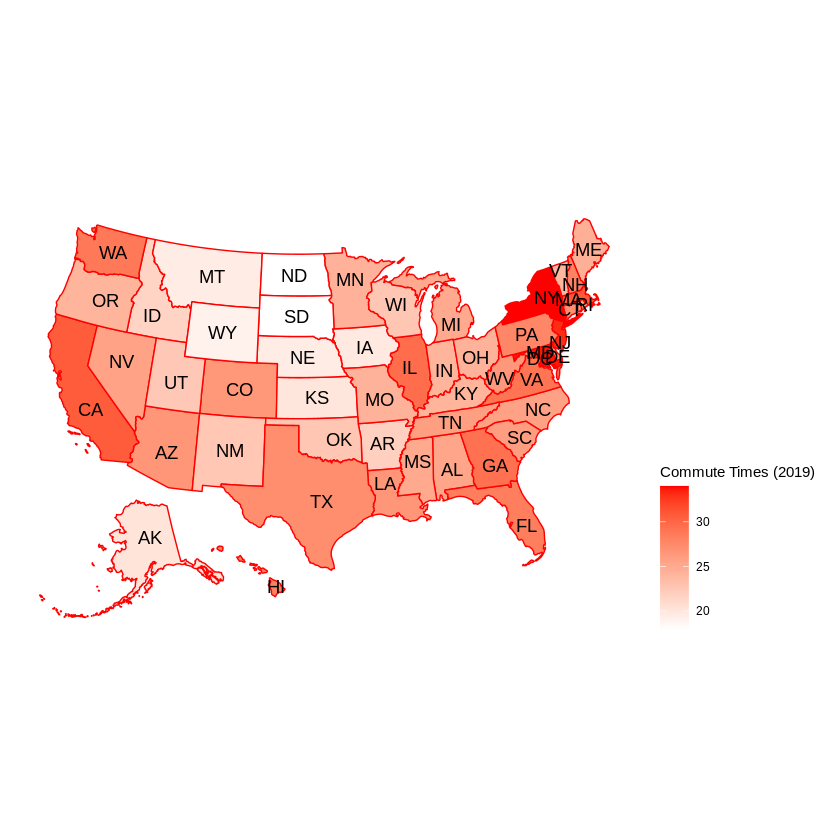

In [ ]:
plot_usmap(
            data = Commute_Time_States_Clean, 
            region = "states",
            values = "Commute_Time", 
            color = "red",
            labels=TRUE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red", name = "Commute Times (2019)"
                                   ) + 
              theme(legend.position = "right")

### Example #5: Uninsured Estimates for Counties in Upper Midwest

This example will compare the uninsured rates in the upper midwest (MN/WI/IA/ND/SD) across two different points in time (2009/2019).  The uninsured rates will be obtained at the county level for this example.

*   Data Source: Small Area Health Insurance Estimates (SAHIE)
*   Census Unit:  County
*   Variables: Name, i.e. name of county; PCTUI_PT, i.e. percent uninsured
*   Year: 2009:2019, this will gather data for all years from 2009 through 2019; a fitler will be applied to include only years 2009 and 2019
*   Other:  region = county:*, i.e. all counties

In [ ]:
PCTUninsured_Annual_Counties <- getCensus(
                                          name = "timeseries/healthins/sahie",
                                          vars = c("NAME", "PCTUI_PT"),
                                          region = "county:*",
                                          year = "2009:2019")

head(PCTUninsured_Annual_Counties)
dim(PCTUninsured_Annual_Counties)

,state,county,NAME,PCTUI_PT,YEAR
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,01,001,"Autauga County, AL",14.0,2009
2,01,003,"Baldwin County, AL",16.6,2009
3,01,005,"Barbour County, AL",17.9,2009
4,01,007,"Bibb County, AL",17.8,2009
5,01,009,"Blount County, AL",17.8,2009
6,01,011,"Bullock County, AL",19.4,2009


[1] 34567     5

Again, tidy up the data.frame so that plotting can be done using the us_map() function in R.

In [ ]:
(
   PCTUninsured_Annual_Counties
   %>% mutate(fips = paste(state,county))                   #create a county level fips for mapping
   %>% mutate(fips = str_replace_all(fips, fixed(" "), "")) #remove space in fips
   %>%filter(state %in% c("27", "55", "19", "38", "46"))    #filter only MN=27/WI=55/IA=19/ND=38/SD=46
   %>%filter(YEAR %in% c("2009", "2019"))                   #filter only Year=2009/Year=2019
   %>%rename(PercentUninsured = PCTUI_PT)                   #rename PCTUI_CPT, i.e. percent uninsured
   %>%rename(Year = YEAR)                                   #rename YEAR
   %>%select(fips,Year,PercentUninsured)                    #select only necessary fields for plotting
) -> PCTUninsured_UpperMidwest_2009and2019

head(PCTUninsured_UpperMidwest_2009and2019)
dim(PCTUninsured_UpperMidwest_2009and2019)

,fips,Year,PercentUninsured
,<chr>,<chr>,<dbl>
1,19001,2009,9.7
2,19003,2009,12.0
3,19005,2009,13.7
4,19007,2009,11.7
5,19009,2009,12.5
6,19011,2009,8.7


[1] 754   3

Create a map for the states in the upper midwest (MN/WI/IA/ND/SD).  This map is for the uninsured rates in 2009.

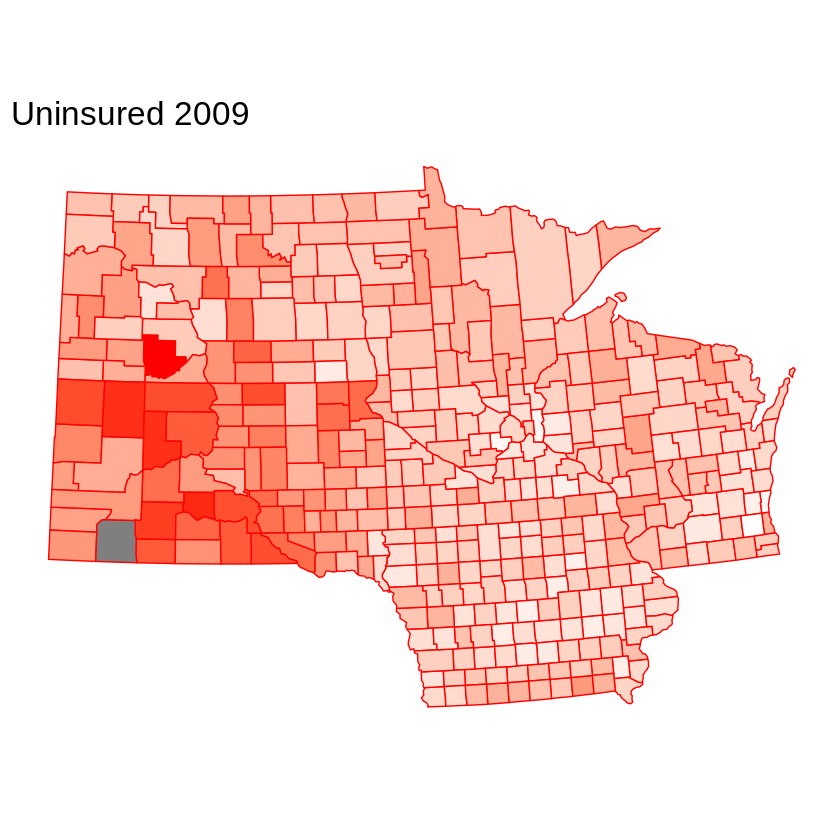

In [ ]:
plot_usmap(
            data = filter(PCTUninsured_UpperMidwest_2009and2019, Year == "2009"),
            region = "counties",
            include = c("MN", "WI", "IA", "ND", "SD"), 
            values = "PercentUninsured", 
            color = "red",
            labels=FALSE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red"
                                   ) + 
              labs(title = "Uninsured 2009") +
              theme(legend.position = "none", plot.title = element_text(size=20))

Next, creating the same map for the uninsured rates in 2019.

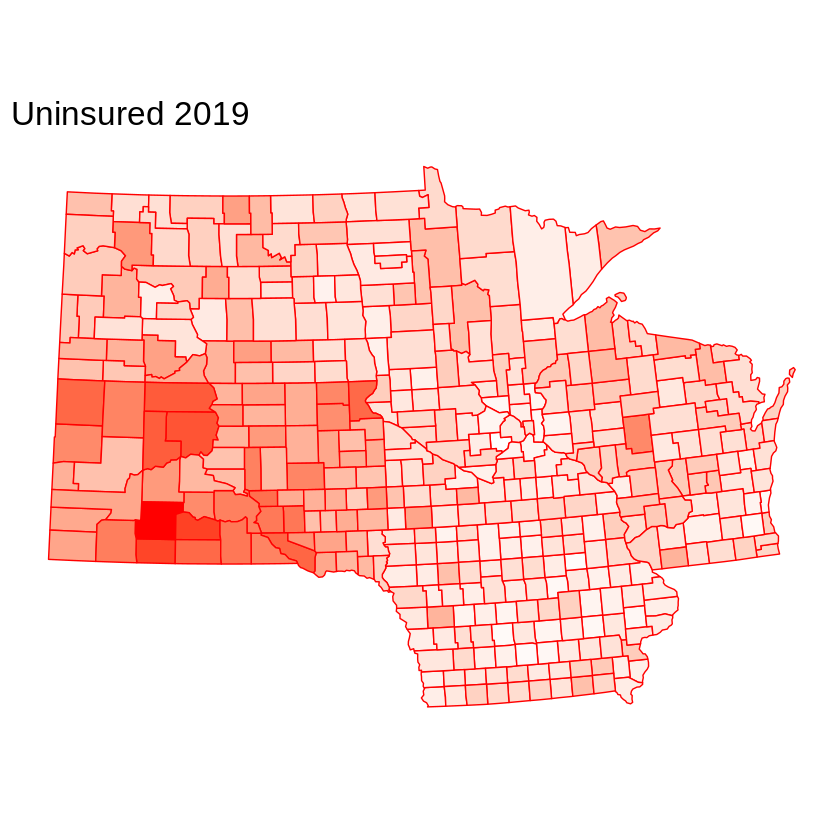

In [ ]:
plot_usmap(
            data = filter(PCTUninsured_UpperMidwest_2009and2019, Year == "2019"),
            region = "counties",
            include = c("MN", "WI", "IA", "ND", "SD"), 
            values = "PercentUninsured", 
            color = "red",
            labels=FALSE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red"
                                   ) + 
              labs(title = "Uninsured 2019") +
              theme(legend.position = "none", plot.title = element_text(size=20))

### Using patchwork() to prettify plots

The patchwork() package can be used to control how two (or more) plots are displayed when using ggplot2(), or us_map() which is subset plotting function of ggplot2().

In [ ]:
install.packages("patchwork")
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Here, the plots that were created above are saved into an object (instead of being pushed to the screen).

In [ ]:
map2009 <- plot_usmap(
            data = filter(PCTUninsured_UpperMidwest_2009and2019, Year == "2009"),
            region = "counties",
            include = c("MN", "WI", "IA", "ND", "SD"), 
            values = "PercentUninsured", 
            color = "red",
            labels=FALSE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red"
                                   ) + 
              labs(title = "   2009") +
              theme(legend.position = "none", plot.title = element_text(size=20))

map2019 <- plot_usmap(
            data = filter(PCTUninsured_UpperMidwest_2009and2019, Year == "2019"),
            region = "counties",
            include = c("MN", "WI", "IA", "ND", "SD"), 
            values = "PercentUninsured", 
            color = "red",
            labels=FALSE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red"
                                   ) + 
              labs(title = "   2019") +
              theme(legend.position = "none", plot.title = element_text(size=20))

To "concatenate" the two plots together, simply use the + operator as is shown below.

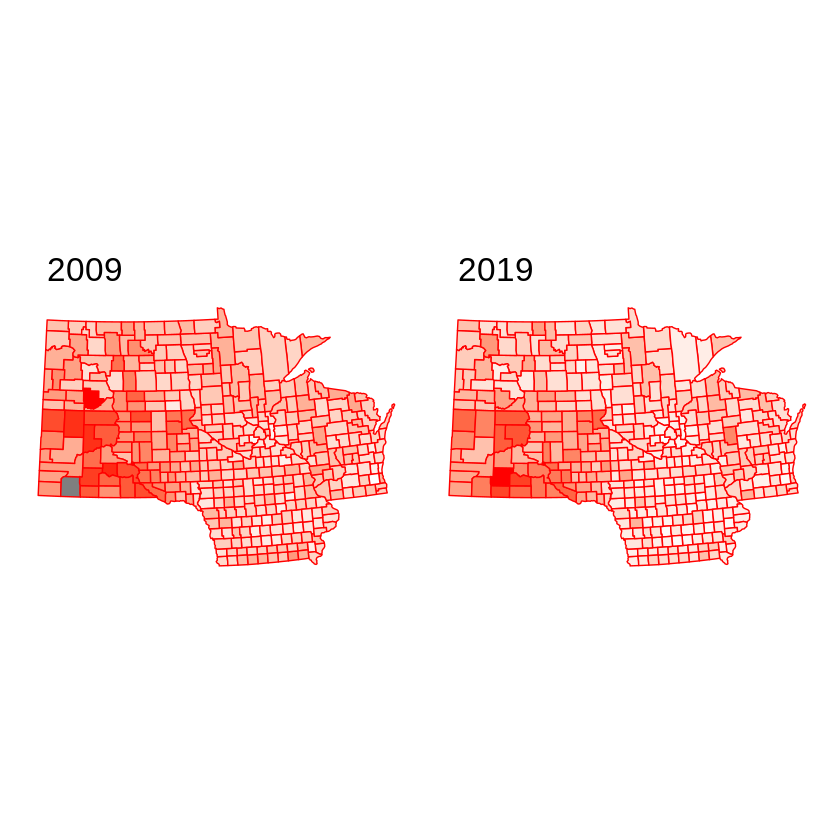

In [ ]:
map2009 + map2019



---



---
End of Document
